In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov  24 20:15:02 2021
@author: Mohammed Abdul Hafeez Khan
"""

'\nCreated on Sat Nov  24 20:15:02 2021\n@author: Mohammed Abdul Hafeez Khan\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
myoware_project_dataset = pd.read_csv('sensors_data.csv') #Reading the values from the dataset(csv file)
#Seperating the the independent variables from the dependent variable
X = myoware_project_dataset.iloc[:, :-1].values  #Independent variables stored in the X
y = myoware_project_dataset.iloc[:, -1].values #Dependent variables stored in y

In [4]:
myoware_project_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Myoware  5000 non-null   int64  
 1   X-axis   5000 non-null   float64
 2   Y-axis   5000 non-null   float64
 3   Z-axis   5000 non-null   float64
 4   Output   5000 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 195.4+ KB


In [5]:
myoware_project_dataset.dtypes

Myoware      int64
X-axis     float64
Y-axis     float64
Z-axis     float64
Output      object
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder # Label encoding to transform the labels into numeric form so as to convert them into machine-readable form.

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)
print(y.shape)

[0 0 0 ... 1 1 1]
(5000,)


In [7]:
print(type(y))


<class 'numpy.ndarray'>


In [8]:
from sklearn.model_selection import train_test_split  #Splitting the dataset into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) #Keeping the random state as 0, so that you can compare the results of the model with mine!
print(X_train)

[[ 2.08e+02 -8.22e+00  1.97e+00 -6.90e-01]
 [ 2.36e+02 -6.03e+00  4.00e+00  5.90e-01]
 [ 3.18e+02 -7.03e+00  7.50e-01 -4.10e-01]
 ...
 [ 7.00e+01 -7.66e+00  4.10e-01 -3.70e-01]
 [ 6.35e+02 -7.78e+00  1.09e+00 -1.00e+00]
 [ 6.28e+02 -7.56e+00  2.09e+00 -1.90e-01]]


In [9]:
from sklearn.preprocessing import StandardScaler #Standardizing the variables by feature extraction using Standard Scaler method.
dataPreprocessing = StandardScaler()             #Standardize features by removing the mean and scaling to unit variance.
X_train = dataPreprocessing.fit_transform(X_train)
X_test = dataPreprocessing.transform(X_test)
print(X_train)

[[-1.06464771 -0.99758179 -0.0654607  -0.48076555]
 [-0.94730703  0.83475484  0.91515164  0.79506289]
 [-0.60366647 -0.00192856 -0.65479423 -0.20167808]
 ...
 [-1.64296964 -0.52903909 -0.81903472 -0.16180844]
 [ 0.72479767 -0.6294411  -0.49055374 -0.78975525]
 [ 0.6954625  -0.44537075 -0.00749347  0.01760494]]


In [10]:
from sklearn.decomposition import KernelPCA #Applying Kernel PCA to project dataset into a higher dimensional feature space, where it is linearly separable.
kpca = KernelPCA(n_components = 2, kernel = 'rbf') #We are selecting 2 compnents here, as it is most ideal value to use here and will be trouble-free for plotting on a 2D graph. rbf is the radial basis fuction kernel.
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
print(X_train)

[[-0.3177733  -0.36014786]
 [ 0.55016558 -0.41157924]
 [-0.37738487 -0.24847902]
 ...
 [-0.25647136 -0.47221475]
 [-0.21033677  0.53086904]
 [-0.03786923  0.3798357 ]]


In [11]:
from sklearn.ensemble import RandomForestClassifier
data_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
data_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [12]:
#Comparison with the decision tree
#feature_importance=pd.DataFrame({
#   'rfc':data_classifier.feature_importances_,
#    'dt':d_classifier.feature_importances_
#}, index=myoware_project_dataset.drop(columns=['X-axis','Y-axis','Z-axis']).columns)
#feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

#index = np.arange(len(feature_importance))
#fig, ax = plt.subplots(figsize=(18,8))
#rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
#dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
#ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

#ax.legend()
#plt.show()

Random (chance) Prediction: AUROC = 0.500
Random Forest Classification: AUROC = 0.951


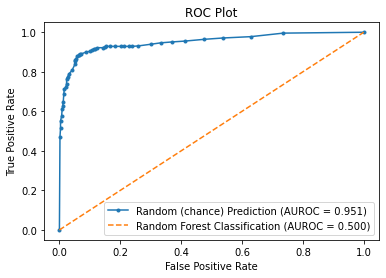

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score # Determining the AUC and ROC curve values

r_probs = [0 for _ in range(len(y_test))]
rfc_probs = data_classifier.predict_proba(X_test)

rfc_probs = rfc_probs[:, 1] # Storing the positive output's only 

r_auc = roc_auc_score(y_test, r_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest Classification: AUROC = %.3f' % (rfc_auc))

#Determing the ROC Curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)

plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random (chance) Prediction (AUROC = %0.3f)' % rfc_auc)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Forest Classification (AUROC = %0.3f)' % r_auc)


plt.title('ROC Plot') # Title

plt.xlabel('False Positive Rate') # X-Axis label
plt.ylabel('True Positive Rate') # Y-Axis label
plt.legend()  # Show legend
plt.show() # Show plot

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = data_classifier.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test.ravel(), y_pred)
print(cm)
accuracy_score(y_test.ravel(), y_pred)

[0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0
 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1
 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1
 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1
 0 1 0 0 1 1 0 0 0 1 1 1 

0.909

In [15]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array([0, 1])

<AxesSubplot:>

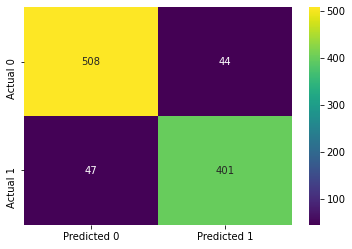

In [16]:
import seaborn as sns
def plot(y_true, y_predlr):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}'for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                        columns = column, index = indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'viridis')
plot(y_test,y_pred)

In [17]:
#Getting the values of True Positives, True Negatives, False Positives and False Negatives with the help of the Confusion Matrix.
TP = cm[0][0]
TN = cm[1][1]
FN = cm[0][1]
FP = cm[1][0]

print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculating the sensitivity, specificity, precision, f1 Score, accuracy and the mis-classification of the model
conf_sensitivity = (TP / float(TP + FN))

conf_specificity = (TN / float(TN + FP))
    
conf_precision = (TP / float(TP + FP))

conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

FPR = (FP / float(FP + TN))

conf_misclassification = 1- conf_accuracy

a =conf_accuracy*100

print('-'*100)
print(f'Sensitivity: {round(conf_sensitivity,4)}') 
print(f'Specificity: {round(conf_specificity,4)}') 
print(f'Mis-Classification: {round(conf_misclassification,4)}') 
print(f'Precision: {round(conf_precision,4)}')
print(f'f_1 Score: {round(conf_f1,4)}')
print(f'Accuracy: {round(conf_accuracy,4)}')
print(f'FPR: {round(FPR,4)}')
print('Therefore, the Accuracy of the model is '+str(a)+' %')


True Positives: 508
True Negatives: 401
False Positives: 47
False Negatives: 44
----------------------------------------------------------------------------------------------------
Sensitivity: 0.9203
Specificity: 0.8951
Mis-Classification: 0.091
Precision: 0.9153
f_1 Score: 0.9178
Accuracy: 0.909
FPR: 0.1049
Therefore, the Accuracy of the model is 90.9 %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


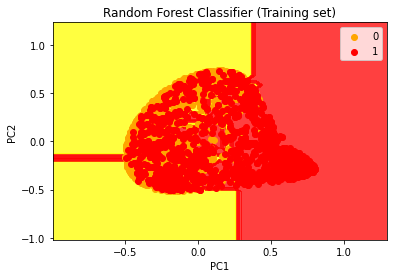

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max() + 0.5, step = 0.05),
                     np.arange(start = X_set[:, 1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 0.05))
plt.contourf(X1, X2, data_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'red', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'red', 'green'))(i), label = j)
plt.title('Random Forest Classifier (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


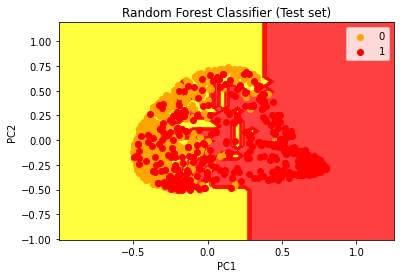

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max() + 0.5, step = 0.05),
                     np.arange(start = X_set[:, 1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 0.05))
plt.contourf(X1, X2, data_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'red', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'red', 'green'))(i), label = j)
plt.title('Random Forest Classifier (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()